# Pair Programming EDA I

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos del Análisis Exploratorio de Datos. Si recordamos, en la lecciones de Pandas estuvimos usando un dataset sobre ataques de tiburones, y que hicimos algunos cambios a lo largo de los ejercicios, incluimos filas, columnas e incluso limpiamos algunas colummas 💪🏽! Para todas los ejercicios de pair programming de EDA I y II usaremos el dataframe generado en el ejercicio de Pandas VII.

En el ejercicio de hoy nos familiarizaremos con el dataset completo sobre el que trabajaremos en la parte de limpieza.

Pero para hacer una exploración buena del dataset no lo podemos hacer como pollo sin cabeza a ver que nos encontramos. Necesitamos hacernos una serie de preguntas o hipótesis que queramos contestar. En este caso os plantemos las siguientes preguntas a contestar a lo largo de los ejercicios de pair programming de este módulo:

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("datos/6.pandas_nuevascolumnas.csv", index_col=0)

In [5]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,03-Jun-2018,Jun,y,M


## 1. Haced una exploración inicial del dataframe:

    ¿Cuál es el número de filas y columnas?

    ¿Cuál es el porcentaje de valores nulos en cada 
    columna? Presenta los resultados en un dataframe, donde las columnas sean el nombre de las variables y el porcentaje de nulos.

    ¿Qué tipos de datos hay en cada columna?

    Extraed la información general del dataframe.

In [6]:
# ¿Cuál es el número de filas y columnas?
df.shape

(1672, 17)

In [7]:
# ¿Cuál es el porcentaje de valores nulos en cada columna? Presenta los resultados en un dataframe, donde las columnas sean el nombre de las variables y el porcentaje de nulos.

df.isnull().sum()*100/df.shape[0]

case_number    0.000000
year           0.000000
type           0.000000
country        0.598086
area           2.751196
location       3.050239
activity       1.854067
name           0.538278
age            9.210526
time           9.569378
species_       7.535885
href           0.000000
injury         0.478469
date           0.000000
mes            2.990431
fatal          5.801435
sexo           0.837321
dtype: float64

In [8]:
# ¿Qué tipos de datos hay en cada columna?

df.dtypes

case_number     object
year           float64
type            object
country         object
area            object
location        object
activity        object
name            object
age             object
time            object
species_        object
href            object
injury          object
date            object
mes             object
fatal           object
sexo            object
dtype: object

In [9]:
#   Extraed la información general del dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1671
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  1672 non-null   object 
 1   year         1672 non-null   float64
 2   type         1672 non-null   object 
 3   country      1662 non-null   object 
 4   area         1626 non-null   object 
 5   location     1621 non-null   object 
 6   activity     1641 non-null   object 
 7   name         1663 non-null   object 
 8   age          1518 non-null   object 
 9   time         1512 non-null   object 
 10  species_     1546 non-null   object 
 11  href         1672 non-null   object 
 12  injury       1664 non-null   object 
 13  date         1672 non-null   object 
 14  mes          1622 non-null   object 
 15  fatal        1575 non-null   object 
 16  sexo         1658 non-null   object 
dtypes: float64(1), object(16)
memory usage: 235.1+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1672.0,1832.688397,528.969901,0.0,1964.0,1997.0,2008.0,2018.0


In [11]:
df.describe(include=["O"]).T

,count,unique,top,freq
case_number,1672,1672,2018.06.25,1
type,1672,6,Unprovoked,1432
country,1662,95,USA,741
area,1626,236,Florida,346
location,1621,1310,"New Smyrna Beach, Volusia County",73
activity,1641,404,Surfing,426
name,1663,1536,male,97
age,1518,94,19,70
time,1512,248,11h00,74
species_,1546,856,White shark,76


## 2. Cread dos dataframes nuevos, uno que incluya solo las variables categóricas y otro que incluya solo las variables numéricas.

In [12]:
# Variables categóricas
df_categoricas = df.select_dtypes(include="object")
df_categoricas.head(2)

,case_number,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo
0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F
1,2018.06.03.a,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,03-Jun-2018,Jun,y,M


In [13]:
# Variables numéricas
df_numericas= df.select_dtypes(include= ["int16", "int32", "int64", "float16", "float32", "float64"])
df_numericas.head()

,year
0,2018.0
1,2018.0
2,2018.0
3,2018.0
4,2018.0


### 2.1 ¿Cuáles son los principales estádisticos de los dataframes?

In [63]:
df_categoricas.describe().T 

,count,unique,top,freq
case_number,1672,1672,2018.06.25,1
type,1672,6,Unprovoked,1432
country,1662,95,USA,741
area,1626,236,Florida,346
location,1621,1310,"New Smyrna Beach, Volusia County",73
activity,1641,404,Surfing,426
name,1663,1536,male,97
age,1518,94,19,70
time,1512,248,11h00,74
species_,1546,856,White shark,76


In [15]:
df_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1672.0,1832.688397,528.969901,0.0,1964.0,1997.0,2008.0,2018.0


### 2.2 Extraed los valores únicos su frecuencia. BONUS presenta los resultados en un dataframe. Os deberá quedar algo como esto:

In [43]:
# Hacemos una lista de las columnas
columnas = df.columns.tolist()
columnas

['case_number',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'age',
 'time',
 'species_',
 'href',
 'injury',
 'date',
 'mes',
 'fatal',
 'sexo']

In [64]:
# Hacemos una lista de los valores únicos
valores = []
for i in df.columns:
    valores.append(df[i].unique())

valores

[array(['2018.06.25', '2018.06.03.a', '2018.05.26.b', ..., 'ND.0003',
        'ND.0002', 'ND.0001'], dtype=object),
 array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
        2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
        2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
        1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
        1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
        1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
        1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
        1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
        1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
        1937., 1936., 1935., 1934., 1932., 1931., 1930., 1929., 1928.,
        1927., 1926., 1925., 1924., 1922., 1919., 1916., 1912., 1906.,
        1905., 1901., 1894., 1892., 1880., 1868., 1800., 1797., 1792.,
        1791., 1788., 1787., 178

In [44]:
# Se hace un zip con las listas creadas
datos = zip(columnas,valores)
datos = list(datos)

In [45]:
# Creamos un DF
df_unicos = pd.DataFrame(datos)

In [67]:
df_unicos.shape

(17, 2)

In [68]:
df_unicos.head(17)

,0,1
0,case_number,"[2018.06.25, 2018.06.03.a, 2018.05.26.b, 2018...."
1,year,"[2018.0, 2017.0, 2016.0, 2015.0, 2014.0, 2013...."
2,type,"[Boating, Unprovoked, Provoked, Invalid, Sea D..."
3,country,"[USA, BRAZIL, AUSTRALIA, ENGLAND, COSTA RICA, ..."
4,area,"[California, Pernambuco, Florida, Queensland, ..."
5,location,"[Oceanside, San Diego County, Piedade Beach, R..."
6,activity,"[Paddling, Swimming, Walking, Feeding sharks, ..."
7,name,"[Julie Wolfe, Jose Ernesto da Silva , Cody Hig..."
8,age,"[57, 18, 15, 32, 21, 30, 60, 33, 19, 25, 10, 6..."
9,time,"[18h00, Late afternoon, 17h00, Morning, 08h15,..."


## Hipótesis

Las hipótesis que os planteamos son:

¿Es Australia el sitio más peligroso y letal para estar relajada en la playa?

In [17]:
df_country = df.groupby("country").count().sort_values("case_number", ascending=False)
df_country.head()

,case_number,year,type,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo
country,,,,,,,,,,,,,,,,
USA,741,741,741,740,739,739,741,722,720,726,741,741,741,736,695,741
AUSTRALIA,343,343,343,338,335,338,343,325,324,330,343,342,343,338,325,342
SOUTH AFRICA,234,234,234,234,234,234,234,226,226,226,234,234,234,230,224,234
BAHAMAS,29,29,29,29,28,28,29,26,26,29,29,29,29,27,28,29
NEW ZEALAND,21,21,21,21,21,20,21,20,20,20,21,21,21,21,21,21


¿Hay diferencias entre los países en los ataques a hombres y mujeres?

In [18]:
df[["country","sexo"]].value_counts()

country       sexo
USA           M       609
AUSTRALIA     M       309
SOUTH AFRICA  M       224
USA           F       132
AUSTRALIA     F        33
                     ... 
RUSSIA        M         1
GRAND CAYMAN  F         1
SCOTLAND      M         1
SENEGAL       M         1
MAURITIUS     F         1
Length: 112, dtype: int64

¿Cuáles son las edades que más sufren ataques?

In [19]:
df["age"].unique()

array(['57', '18', '15', '32', '21', '30', '60', '33', '19', '25', '10',
       '69', '55', '35', '20', '54', '22', '31', '40', '37', '11', '13',
       '34', '50', '46', '48', '17', '28', '65', '73', '58', '36', '60s',
       '51', '61', '59', '42', '6', '27', '23', '29', '39', '24', '12',
       '26', '71', '43', '9', '44', '14', '62', '52', '38', '68', '16',
       '47', '63', '70', '41', '40s', '53', '20s', '7', '66', '45', '74',
       '64', '8', '56', '49', '18 or 20', 'Teen', '30s', '77', '8 or 10',
       '84', '\xa0 ', ' ', '30 or 36', '6½', '5', ' 30', ' 28', "60's",
       '67', '>50', '? & 19', '21, 34,24 & 35', '30 & 32', '13 or 18',
       '7 or 8', '9 or 10', nan, 'young', '13 or 14'], dtype=object)

In [20]:
df["age"].value_counts() # Entre 15 y 20 años

19          70
18          60
20          58
15          57
17          57
            ..
64           1
74           1
40s          1
60s          1
13 or 14     1
Name: age, Length: 94, dtype: int64

Independientemente de la edad, ¿sufren los hombres más ataques que las mujeres?

In [21]:
df["sexo"].value_counts()

M    1435
F     223
Name: sexo, dtype: int64

¿En qué mes ocurren más ataques?

In [22]:
df["mes"].value_counts()

Aug              158
Sep              153
Oct              146
Jul              143
Jun              134
Jan              126
Apr              124
May              105
Mar              104
Dec              103
Nov               99
Feb               95
Before            56
NoBefore          11
No                 7
Ca                 6
Reported           4
Summer             3
Circa              2
NoBeforeMay        2
NoBeforeAug        2
Between            2
BeforeJun          2
WorldWarII         2
ReportedMay        2
ReportedFeb        2
BeforeJul          2
NoAfterAugust      1
NoBeforeJan        1
BeforeApr          1
BeforeMar          1
NoBeforeMar        1
Said               1
BeforeFeb          1
Early              1
During             1
ReportedApr        1
Beforer            1
MarMar             1
May2015            1
ReportedJun        1
ReportedDec        1
ReportedJan        1
MidJulJul          1
MidAug             1
ReportedAug        1
BeforeOct          1
ReportedSep  

¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

In [23]:
df[["species_","fatal"]].value_counts()

species_                  fatal
White shark               n        46
4' shark                  n        34
White shark               y        30
Bull shark                n        22
Tiger shark               n        22
                                   ..
Bull shark, 2.5 m         n         1
Bull shark, 2.5m          n         1
Bull shark, 2.7 m         n         1
Bull shark, 2.8 to 3.1 m  n         1
Grey nurse shark, 11'     n         1
Length: 871, dtype: int64


¿Cómo han evolucionado los ataques a lo largo del tiempo?

In [24]:
df["year"].value_counts()

0.0       125
2015.0     68
2007.0     57
2012.0     54
2002.0     53
         ... 
1785.0      1
1783.0      1
1780.0      1
1779.0      1
1784.0      1
Name: year, Length: 147, dtype: int64

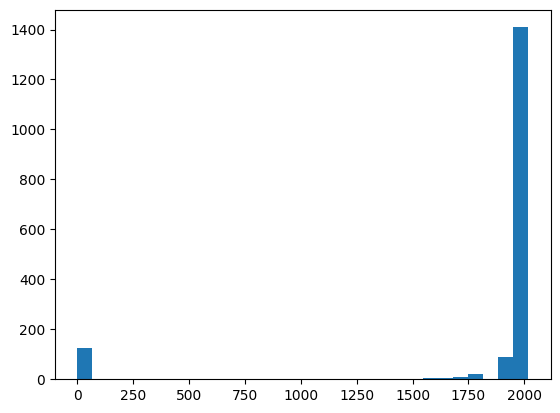

In [25]:
plt.figure()

plt.hist(x=df["year"], bins=30)

plt.show()

## Conclusiones

De qué nos sirven estos números y dataframe? Extraed conclusiones de ellos.

Por ejemplo:
¿Hay alguna columna que no tenga sentido su tipo de datos?
¿Hay alguna columna que no tenga sentido su nombre?
¿Hay alguna columna que no tenga sentido su contenido?
¿Hay alguna columna que tenga demasiadas categorías o valores que nos pueda hacer difícil trabajar con ella?

In [26]:
df.head(1)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F


¿Hay alguna columna que no tenga sentido su tipo de datos?

Sí, casi todas son tipo object

- date, year y mes: podrían ser tipo datetime.
- age: debería ser integer o estar agrupada.
- case_number: podría ser un int porque indica número.

In [27]:
df.dtypes

case_number     object
year           float64
type            object
country         object
area            object
location        object
activity        object
name            object
age             object
time            object
species_        object
href            object
injury          object
date            object
mes             object
fatal           object
sexo            object
dtype: object

¿Hay alguna columna que no tenga sentido su nombre?

No.
Pero href, podría tener un nombre más intuitivo como enlace o link.

In [28]:
df.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'age', 'time', 'species_', 'href', 'injury', 'date',
       'mes', 'fatal', 'sexo'],
      dtype='object')

¿Hay alguna columna que no tenga sentido su contenido?

In [29]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal,sexo
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,n,F
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,03-Jun-2018,Jun,y,M


Es complicado sacar una conclusión general a partir de la columna injury, sin embargo, esta nos da mayor información al describir el ataque.

¿Hay alguna columna que tenga demasiadas categorías o valores que nos pueda hacer difícil trabajar con ella?

- edad: mezcla número y categorías
- injury: es descriptiva del suceso
- name: no aporta mayor información para conclusiones generales, sin embargo podría permitir conocer si la persona ha sufrido más de un ataque.